In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
# data Preprocessing
def cleaned_data(df,x):
    df['Gender'] = df['Gender'].fillna( df['Gender'].dropna().mode().iloc[0] )
    df['Gender'] = df['Gender'].map({'Female':0,'Male':1}).astype(np.int)

    df['Married'] = df['Married'].fillna( df['Married'].dropna().mode().iloc[0] )
    df['Married'] = df['Married'].map({'No':0,'Yes':1}).astype(np.int)

    df['Education'] = df['Education'].fillna( df['Education'].dropna().mode().iloc[0] )
    df['Education'] = df['Education'].map({'Not Graduate':0,'Graduate':1}).astype(np.int)

    df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].dropna().mode().iloc[0] )
    df['Self_Employed'] = df['Self_Employed'].map({'No':0,'Yes':1}).astype(np.int)

    df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].dropna().mean())
    df['ApplicantIncome'] = df['ApplicantIncome'].fillna( df['ApplicantIncome'].dropna().median())

    df['CoapplicantIncome'] = df['CoapplicantIncome'].fillna( df['CoapplicantIncome'].dropna().mean())
    df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().median())

    df['Property_Area'] = df['Property_Area'].fillna( df['Property_Area'].dropna().mode().iloc[0] )
    df['Property_Area'] = df['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2}).astype(np.int)
    
    df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].dropna().median())
    if x==1:
        df['Loan_Status'] = df['Loan_Status'].fillna( df['Loan_Status'].dropna().mode().iloc[0] )
        df['Loan_Status'] = df['Loan_Status'].map({'N':0,'Y':1}).astype(np.int)

    df['Dependents'] = df['Dependents'].str.replace("+","")
    df['Dependents'] = df['Dependents'].fillna(df['Dependents'].dropna().mode().iloc[0])
    
    return df



In [3]:
df = pd.read_csv('uncleaned_train.csv')
df_train = cleaned_data(df,1)
df_train.to_csv('train.csv')
df_1 = pd.read_csv('uncleaned_test.csv')
df_test = cleaned_data(df_1,2)
df_test.to_csv('test.csv')

from sklearn.utils import shuffle

df_train = shuffle(df_train)
cols = df_train.columns
col_train = cols[1:len(cols)-1]
x = df_train[col_train]
y= df_train['Loan_Status']
col_test = cols[1:len(cols)-1]
test = df_test[col_test]  #predict the value for this dataset
df_train.tail()
#len(df_train)
#print x_train.isnull().any() to check whether column contain any nan value


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
373,LP002205,1,0,1,1,0,3062,1987.0,111.0,180.0,0.0,2,0
459,LP002473,1,1,0,1,0,8334,0.0,160.0,360.0,1.0,1,0
390,LP002255,1,0,3,1,0,9167,0.0,185.0,360.0,1.0,0,1
285,LP001924,1,0,0,1,0,3158,3053.0,89.0,360.0,1.0,0,1
532,LP002723,1,0,2,1,0,3588,0.0,110.0,360.0,0.0,0,0


In [15]:
# starting testing and prediction to find out whether the bank provide the loan 
from sklearn import cross_validation,neighbors,svm,tree,datasets
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.2)
#clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train,y_train)

score = clf.score(X_test,y_test)
print score
prediction =clf.predict(test)
loan_id = df_test['Loan_ID']
with open('result.csv','w') as csvfile:
    writer = csv.writer(csvfile)
    for i in range(len(prediction)):
        if prediction[i]==0:
            writer.writerow([loan_id[i],'N'])
        else:
            writer.writerow([loan_id[i],'Y'])

columns = ['Loan_ID','Loan_status']  

data = pd.read_csv("result.csv",names=columns, encoding ="ISO-8859-1")
data.to_csv("result.csv",index=False)

0.79674796748


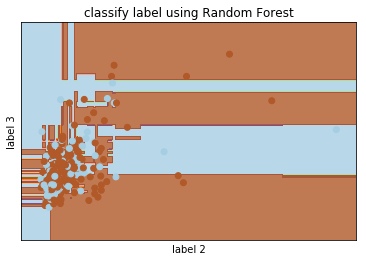

In [16]:
import matplotlib
import matplotlib.pyplot as plt

me = x.ix[:,5].mean()
X2= x.ix[:,5]/me
me1 = x.ix[:,7].mean()
X1 = x.ix[:,7]/me1
X = pd.concat([X2,X1], axis=1)
x_min, x_max = X.ix[:, 0].min() - 1, X.ix[:, 0].max() + 1
y_min, y_max = X.ix[:, 1].min() - 1, X.ix[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
titles = 'classify label using Random Forest'
plt.subplots_adjust(wspace=0.4, hspace=0.4)
#clf4  =  neighbors.KNeighborsClassifier(n_neighbors=1)
clf4 = RandomForestClassifier(n_estimators=5)
clf4.fit(X,y)
Z = clf4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X.ix[:, 0], X.ix[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('label 2')
plt.ylabel('label 3')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(titles)
plt.show()

